# Heart Disease Predictive Model
1. [Introduction](#introduction)
2. [Data Exploration](#data-exploration)  
&emsp;2.1 [Descriptive Statistics](#descriptive-statistics)  
&emsp;2.2 [Missing Values](#missing-values)  
&emsp;2.3 [Visualization](#visualization)

# Introduction
&emsp;This Dataquest guided project's objective is to build a predictive model using the K-Nearest Neighbours algorithm. The available dataset from [Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) contains 12 variables including the response variable (HeartDisease) and 918 records.  

## Python Libraries

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib as mpl
# from matplotlib import cm
# from matplotlib.colors import ListedColormap, LinearSegmentedColormap
mpl.style.use("ggplot")
%matplotlib inline

# Data Exploration

In [2]:
# import dataset
heart = pd.read_csv("https://raw.githubusercontent.com/moscmh/heart_disease/main/heart.csv")
print("Number of observations:", heart.shape[0], "\nNumber of features:", heart.shape[1])
heart.head(5)


Number of observations: 918 
Number of features: 12


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Descriptive Statistics

In [3]:
# Descriptive Statistics
heart.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


## Missing Values

In [4]:
# Search for missing values
heart.isna().sum().sum()

0

The average age of the patients is 53.5. Resting blood pressure and serum cholesterol has values of 0 which seem incorrect. There is no missing values in the dataset.

## Visualization

### Categorical Features

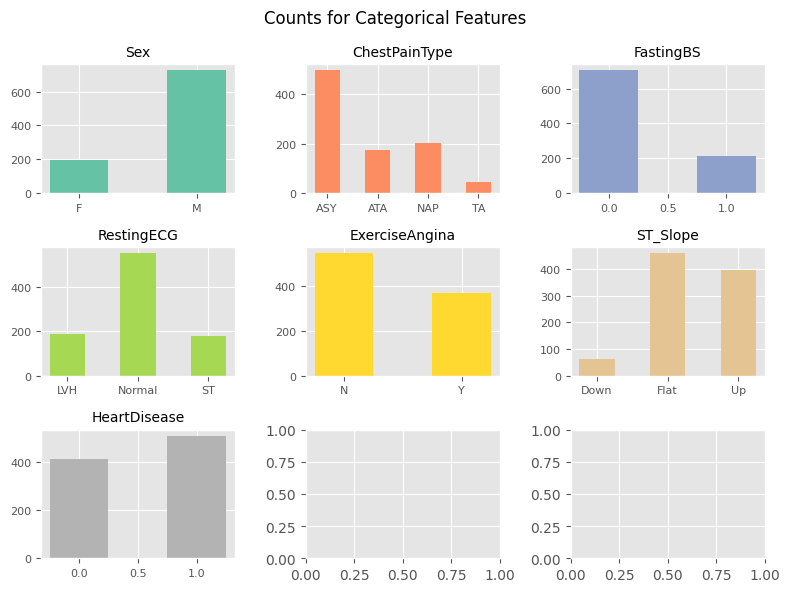

In [46]:
cat_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

cmap = plt.cm.Set2
colors = [cmap(i) for i in np.linspace(0,1,7)]
fig, axes = plt.subplots(3,3, figsize=(8,6))
for i, ax in enumerate(axes.reshape(-1)):
    try:
        counts = heart[cat_cols[i]].value_counts().sort_index()
        ax.bar(counts.index, counts.values, width=.5, color=colors[i])
        ax.set_title(cat_cols[i], fontsize=10)
        ax.tick_params(axis='both', which='major', labelsize=8)
    except IndexError:
        pass

fig.suptitle("Counts for Categorical Features")
fig.tight_layout()
plt.show()

The Sex, ChestPainType, FastingBloodSugar, RestingECG, and ST_Slope features also have imbalanced counts of values. For instance, there are only around 200 female but over 700 male in the dataset.

In [47]:
cat_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

cmap = plt.cm.Set3
colors = [cmap(i) for i in np.linspace(0,1,6)]
fig, axes = plt.subplots(2,3, figsize=(5,6))
for i, ax in enumerate(axes.reshape(-1)):
    try:
        counts = heart[cat_cols[i]].value_counts().sort_index()
        x = np.arange(len(counts.index))
        width = .35
        ax.bar(x - width/2, counts.values, width=width, color=colors[i])
        ax.set_title(cat_cols[i], fontsize=10)
        ax.tick_params(axis='both', which='major', labelsize=8)
    except IndexError:
        pass

fig.suptitle("Counts for Categorical Features")
fig.tight_layout()
plt.show()

array([0, 1, 2, 3, 4])